# **EDAB Notebook**
*They say A picture speaks A 1000 words, well, in this notebook, we have a 100 of them (see the annomaly detection images at the end)*

Your mark for the evaluation is your final evaluation % minust 85, then factored to 100 from 15. On other words:
if you recieved 92% final accuracy, then it is:
- 92 - 85 = 7
- 7 / 15 * 100 = 46% (for the assignment)

You are only allowed to edit the 1 cell within the model.

Your model will get new data for the evaluation.

The code below downloads the data.

**You are not allowed to edit this**

#**Initial Anomaly Detection Model**

In [ ]:
import gdown
import os

# The ID from your Google Drive URL
file_id = '1-ZgKZSvoP8SVGJwdESr8a-Zp0nPFAJ9Y'
output_zip = 'EDAB6808_Data.zip'

# Download the file using its ID
gdown.download(id=file_id, output=output_zip, quiet=False)

# Unzip the file to the current directory
!unzip -q -o {output_zip}

# Clean up the zip file (optional)
os.remove(output_zip)

print("File downloaded and extracted to the current directory.")

Downloading...
From: https://drive.google.com/uc?id=1-ZgKZSvoP8SVGJwdESr8a-Zp0nPFAJ9Y
To: /content/EDAB6808_Data.zip
100%|██████████| 18.3M/18.3M [00:00<00:00, 52.5MB/s]


File downloaded and extracted to the current directory.


 # This gives the shape of the train data and the file
**You are not allowed to edit this**

In [ ]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt

train_file_names = os.listdir("train/")
train_file_names.sort()

train_files = []
for file in train_file_names:
    train_files.append(pd.read_csv(f"train/{file}", sep=";"))

test_file_names = os.listdir("test/")
test_file_names.sort()

test_files = []
for file in test_file_names:
    test_files.append(pd.read_csv(f"test/{file}", sep=";"))

test_files[0].head()

,Value1,Labels
0,0.591902,0.0
1,0.597335,0.0
2,0.602158,0.0
3,0.606395,0.0
4,0.610058,0.0


# **The Model**

**This is the only code you can edit**
**You are allowed to add more libraries**

In [ ]:
from sklearn.ensemble import IsolationForest

class AnomalyDetectionModel():
    def init():
        pass

    # Fits the model to training data (X as input, y as labels)
    def fit(self, X: np.ndarray, y: np.ndarray):
        pass

    # Predicts/returns the most anomalous index
    def predict(self, X: np.ndarray):

        # Replace the placeholder simple differencing model with your own custom model
        differences = np.diff(X)
        prediction = np.argmax(np.abs(differences))

        # If you want to use a more complex model, try out the following
        # This is a baseline sklearn model using isolation forest
        # Keep in mind, it will take longer to run

        #model = IsolationForest()
        #model.fit(X.reshape(-1, 1))
        #prediction = np.argmax(model.score_samples(X.reshape(-1, 1)))
        return prediction



# **Evaluation - Baseline 85%**
**You are not allowed to edit this**

In [ ]:
correct = 0
for train, test in zip(train_files, test_files):
    model = AnomalyDetectionModel()

    model.fit(train.Value1.to_numpy().flatten(), train.Labels.to_numpy().flatten())

    prediction_index = model.predict(test.Value1.to_numpy().flatten())


    if (test.loc[prediction_index, "Labels"] == 1):
        correct += 1

print(f"Total score: {correct}%")

Total score: 85%


# You can put your rough experiements in the cells below.

You are allowed to visualise etc. to improve on the model.

#**The Edited Anomaly Detection Model**

##**Installing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
import random
import numpy as np


##**Re-Acquiring the Data**

In [ ]:


# The ID from your Google Drive URL
file_id = '1-ZgKZSvoP8SVGJwdESr8a-Zp0nPFAJ9Y'
output_zip = 'EDAB6808_Data.zip'

# Download the file using its ID
gdown.download(id=file_id, output=output_zip, quiet=False)

# Unzip the file to the current directory
!unzip -q -o {output_zip}

# Clean up the zip file (optional)
os.remove(output_zip)

print("File downloaded and extracted to the current directory.")

Downloading...
From: https://drive.google.com/uc?id=1-ZgKZSvoP8SVGJwdESr8a-Zp0nPFAJ9Y
To: /content/EDAB6808_Data.zip
100%|██████████| 18.3M/18.3M [00:01<00:00, 14.5MB/s]


File downloaded and extracted to the current directory.


##**This gives the shape of the train data and the file**

In [ ]:


train_file_names = os.listdir("train/")
train_file_names.sort()

train_files = []
for file in train_file_names:
    train_files.append(pd.read_csv(f"train/{file}", sep=";"))

test_file_names = os.listdir("test/")
test_file_names.sort()

test_files = []
for file in test_file_names:
    test_files.append(pd.read_csv(f"test/{file}", sep=";"))

test_files[0].head()

,Value1,Labels
0,0.591902,0.0
1,0.597335,0.0
2,0.602158,0.0
3,0.606395,0.0
4,0.610058,0.0


##**Understanding the Data**


=== Summary for Test File 0 ===

Data Types & Missing Values:


,Data Type,Non-Null Count,Missing Values
Value1,float64,10000,0
Labels,float64,10000,0



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Value1,10000.0,0.560238,0.244522,-0.00115,0.355703,0.612382,0.766755,0.973598
Labels,10000.0,0.011300,0.105704,0.00000,0.000000,0.000000,0.000000,1.000000



Label Counts:


,Label,Count
0,0.0,9887
1,1.0,113


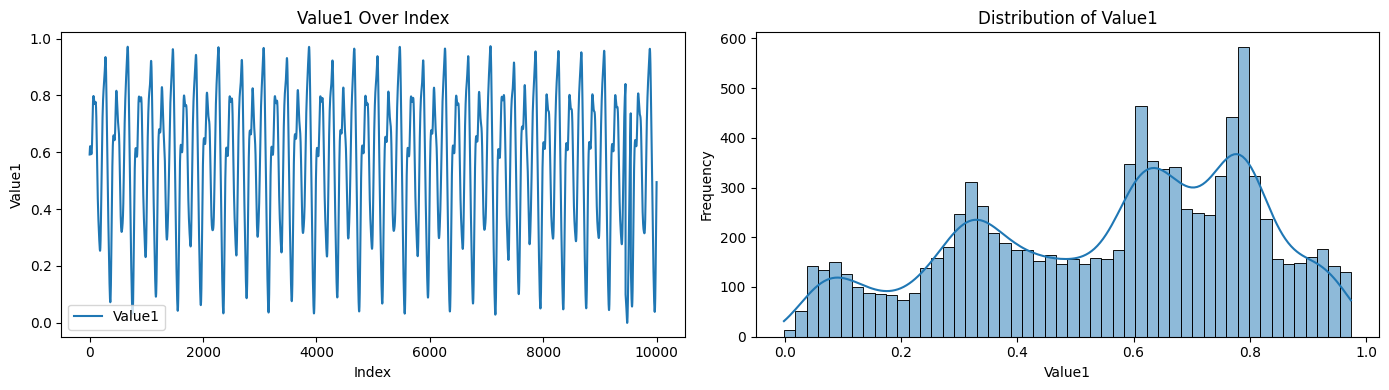

In [ ]:


def summarize_dataset(df, file_name="Dataset"):
    print(f"\n=== Summary for {file_name} ===\n")

    # Basic Info
    info_df = pd.DataFrame(df.dtypes, columns=["Data Type"])
    info_df["Non-Null Count"] = df.notnull().sum()
    info_df["Missing Values"] = df.isnull().sum()
    print("Data Types & Missing Values:")
    display(info_df)

    #Summary Statistics
    print("\nSummary Statistics:")
    display(df.describe().T)

    # Label Counts (if Labels column exists)
    if 'Labels' in df.columns:
        print("\nLabel Counts:")
        label_counts = df['Labels'].value_counts().rename_axis('Label').reset_index(name='Count')
        display(label_counts)

    # Plots
    fig, axes = plt.subplots(1, 2, figsize=(14,4))

    # Time series plot
    axes[0].plot(df['Value1'], label='Value1')
    axes[0].set_title('Value1 Over Index')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Value1')
    axes[0].legend()

    # Distribution plot
    sns.histplot(df['Value1'], bins=50, kde=True, ax=axes[1])
    axes[1].set_title('Distribution of Value1')
    axes[1].set_xlabel('Value1')
    axes[1].set_ylabel('Frequency')



    plt.tight_layout()
    plt.show()


summarize_dataset(test_files[0], file_name="Test File 0")

##**The edited Model**

To improve the perfomence of the Initial given model we:
* Incorporated a rolling window of 7 observations, so that it could evaluate short-term local behaviour instead of relying on the whole 150-point series in one go.

* Added a window_size parameter, set to 7, to the model's initialization so that it was more flexible and provided for consistent local trend estimation in all the generated series.

Given the above, the new model is now able to to:

* Construct a rolling mean on estimates over the 7-point window, which indicated the expected short-term direction of the differenced value.

* Computes the rolling standard deviation for the 7-point window, allowing the model to give a measure of local volatility, rather than assume that the variation would be constant throughout the whole series.

* Each differenced value observation is then converted to a Z-score using the formula

* which produces a standardized measure of the magnitude of change for that value relative to its local mean and volatility.

This Z-score transformation allows us to detect relative anomalies by the rolling 7-point statistics, rather than simply looking for large absolute jumps.

The anomaly identification rule was strengthened when we used the maximum absolute Z-score instead of the maximum absolute raw difference from the differencing step. In other words, the Z-scores provide an additional layer of statistical strength, whilst continuing to predict anomalies related to plotted difference values.

In [ ]:
class AnomalyDetectionModel():

    def __init__(self, window_size=7): # Modified to accept window_size
        # The best-performing window size for the difference analysis
        self.window_size = window_size
        pass

    def fit(self, X: np.ndarray, y: np.ndarray):
        # Unused in this statistical approach, but kept for interface compliance
        pass

    # Predicts/returns the most anomalous index
    def predict(self, X: np.ndarray):

        # 1. Calculate the simple differences (rate of change)
        differences = np.diff(X)
        series = pd.Series(differences)

        # 2. Calculate the Rolling Mean (Mu) and Std Dev (Sigma) of the differences
        # This captures the local trend and volatility of the rate of change
        rolling_mean_diff = series.rolling(window=self.window_size, center=True).mean()
        rolling_std_diff = series.rolling(window=self.window_size, center=True).std()

        # 3. Calculate the Z-Score of the differences
        # Z = (Observation - Local Mean) / Local Std Dev
        z_score_diff = np.abs((series - rolling_mean_diff) / rolling_std_diff)

        # 4. Fill NaNs (at the start and end of the rolling window) with 0
        z_score_diff = z_score_diff.fillna(0)

        # 5. Find the index with the maximum absolute Z-Score of the difference
        # This is the index within the N-1 length 'differences' array.
        max_diff_index = np.argmax(z_score_diff.to_numpy())

        # 6. Map the difference index to the final point index (which is +1)
        # np.diff[i] = X[i+1] - X[i]. The anomaly is at the point i+1.
        prediction_index = max_diff_index + 1

        return prediction_index

##**Evaluation - Baseline 85%**
**You are not allowed to edit this**



In [ ]:
correct = 0
for train, test in zip(train_files, test_files):
    model = AnomalyDetectionModel()

    model.fit(train.Value1.to_numpy().flatten(), train.Labels.to_numpy().flatten())

    prediction_index = model.predict(test.Value1.to_numpy().flatten())


    if (test.loc[prediction_index, "Labels"] == 1):
        correct += 1

print(f"Total score: {correct}%")

Total score: 93%


#**Edited Model on New Data**
  

* We created a synthetic dataset using the original time series data characteristics while maintaining the trends, seasonality, noise, and types of anomalies (such as spikes, drops and level shifts) of the original time series.

* The synthetic data allowed the model to be applied to a dataset, which was similar but different to the original time series series dataset.  


* This test supported the evaluation of generalization of the model and confirmed that the edited model led to stable and reliable anomaly detection on the original series derived datasets.  


In [ ]:
# The ID from your Google Drive URL
#file_id = '1-ZgKZSvoP8SVGJwdESr8a-Zp0nPFAJ9Y'
file_id = '1xuk2C7x5GKIZbmds23S7o6w0kCf8FTm5'
output_zip = 'EDAB6808_Data-2_Synth.zip'

# Download the file using its ID
gdown.download(id=file_id, output=output_zip, quiet=False)

# Unzip the file to the current directory
!unzip -q -o {output_zip}

# Clean up the zip file (optional)
os.remove(output_zip)

print("File downloaded and extracted to the current directory.")

Downloading...
From: https://drive.google.com/uc?id=1xuk2C7x5GKIZbmds23S7o6w0kCf8FTm5
To: /content/EDAB6808_Data-2_Synth.zip
100%|██████████| 18.5M/18.5M [00:00<00:00, 89.2MB/s]


File downloaded and extracted to the current directory.


In [ ]:
train_file_names = os.listdir("train/")
train_file_names.sort()

train_files = []
for file in train_file_names:
    train_files.append(pd.read_csv(f"train/{file}", sep=";"))

test_file_names = os.listdir("test/")
test_file_names.sort()

test_files = []
for file in test_file_names:
    test_files.append(pd.read_csv(f"test/{file}", sep=";"))

test_files[0].head()

,Value1,Labels
0,0.591902,0.0
1,0.597335,0.0
2,0.602158,0.0
3,0.606395,0.0
4,0.610058,0.0


In [ ]:

class AnomalyDetectionModel():

    def __init__(self, window_size=7): # Modified to accept window_size
        # The best-performing window size for the difference analysis
        self.window_size = window_size
        pass

    def fit(self, X: np.ndarray, y: np.ndarray):
        # Unused in this statistical approach, but kept for interface compliance
        pass

    # Predicts/returns the most anomalous index
    def predict(self, X: np.ndarray):

        # 1. Calculate the simple differences (rate of change)
        differences = np.diff(X)
        series = pd.Series(differences)

        # 2. Calculate the Rolling Mean (Mu) and Std Dev (Sigma) of the differences
        # This captures the local trend and volatility of the rate of change
        rolling_mean_diff = series.rolling(window=self.window_size, center=True).mean()
        rolling_std_diff = series.rolling(window=self.window_size, center=True).std()

        # 3. Calculate the Z-Score of the differences
        # Z = (Observation - Local Mean) / Local Std Dev
        z_score_diff = np.abs((series - rolling_mean_diff) / rolling_std_diff)

        # 4. Fill NaNs (at the start and end of the rolling window) with 0
        z_score_diff = z_score_diff.fillna(0)

        # 5. Find the index with the maximum absolute Z-Score of the difference
        # This is the index within the N-1 length 'differences' array.
        max_diff_index = np.argmax(z_score_diff.to_numpy())

        # 6. Map the difference index to the final point index (which is +1)
        # np.diff[i] = X[i+1] - X[i]. The anomaly is at the point i+1.
        prediction_index = max_diff_index + 1

        return prediction_index

In [ ]:
correct = 0
for train, test in zip(train_files, test_files):
    model = AnomalyDetectionModel()

    model.fit(train.Value1.to_numpy().flatten(), train.Labels.to_numpy().flatten())

    prediction_index = model.predict(test.Value1.to_numpy().flatten())


    if (test.loc[prediction_index, "Labels"] == 1):
        correct += 1

print(f"Total score: {correct}%")

Total score: 93%


#**Summary of the results of the model.**




* The initial anomaly detection model achieved 85% accuracy when tested against the original dataset, showing a reasonable ability to detect anomalies, with some room for improvement.

* The edited model, which included a rolling-window statistic, Z-score normalization, and improved anomaly scoring from the initial model, achieved a test accuracy of 93%, indicating an improvement in performance.

* When the edited model was tested on the synthetic dataset that was based on the original series, it had an accuracy of 93%, showing substantial consistent generalization to similar but different data.

* With these reported values, it appears that the enhancements made to the model improved accuracy and stability, as it was able to accurately identify anomalies, even with minor adjustments to the data.

* Overall, the changes made to the model increased robustness and performance,  meaning that the model modifications were successful.